In [1]:
import numpy as np
import pandas as pd
import cPickle as pickle
from IPython.display import display
from IPython.display import Image
import matplotlib
%matplotlib inline

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
def unpickle(filename_pickle):
    print 'unpickling:', filename_pickle, '...'
    return pickle.load(open(filename_pickle, 'rb'))

def pickleup(object_to_pickle, filename_pickle):
    print 'pickling:', filename_pickle,'...'
    pickle.dump(object_to_pickle, open(filename_pickle, 'wb'))

In [4]:
# aisles = pd.read_csv('raw_data/aisles.csv')
# departments = pd.read_csv('raw_data/departments.csv')
# products = pd.read_csv('raw_data/products.csv')
# order_products_train_df = pd.read_csv("raw_data/order_products__train.csv")
# order_products_prior_df = pd.read_csv("raw_data/order_products__prior.csv")
# orders = pd.read_csv("raw_data/orders.csv")

In [60]:
# pickleup(aisles, 'pickled_data/aisles.p')
# pickleup(departments, 'pickled_data/departments.p')
# pickleup(products, 'pickled_data/products.p')
# pickleup(order_products_train_df, 'pickled_data/order_products_train_df.p')
# pickleup(order_products_prior_df, 'pickled_data/order_products_prior_df.p')
# pickleup(orders, 'pickled_data/orders.p')

aisles = unpickle('pickled_data/aisles.p')
departments = unpickle('pickled_data/departments.p')
products = unpickle('pickled_data/products.p')
# unpickle('pickled_data/order_products_train_df.p')
# unpickle('pickled_data/order_products_prior_df.p')
orders = unpickle('pickled_data/orders.p')
# print 'finished!'

unpickling: pickled_data/aisles.p ...
unpickling: pickled_data/departments.p ...
unpickling: pickled_data/products.p ...
unpickling: pickled_data/orders.p ...


## Cleaning and Joins

In [82]:
def frame_cleaners(products=products, aisles=aisles, departments=departments):
    products.product_name = products.product_name.str.replace("'", '')
    products.product_name = products.product_name.str.replace(',', '')
    products.product_name = products.product_name.str.replace(' ', '_')
    
    aisles.aisle = aisles.aisle.str.replace(' ', '_')
    
    departments.department = departments.department.str.replace(' ','_')
    
    new_products = pd.merge(products, aisles, left_on='aisle_id', right_on='aisle_id', how='left')
    final_products = pd.merge(new_products, departments, left_on='department_id', right_on='department_id', how='left')
    
    final_products = final_products[['product_id', 'aisle_id', 'department_id', 'product_name', 'aisle', 'department']]
    
    return final_products, aisles, departments

new_products, aisles, departments = frame_cleaners()

In [85]:
def new_train_new_prior(original_train = order_products_train_df, original_prior = order_products_prior_df, new_products=new_products):
    new_train = pd.merge(order_products_train_df, orders, left_on='order_id', right_on='order_id', how='inner')
    new_prior = pd.merge(order_products_prior_df, orders, left_on='order_id', right_on='order_id', how='inner')
    
    new_train = pd.merge(new_train, new_products, left_on='product_id', right_on = 'product_id')
    new_prior = pd.merge(new_prior, new_products, left_on='product_id', right_on = 'product_id')
    
    return new_train, new_prior

new_train, new_prior = new_train_new_prior()

NameError: name 'order_products_train_df' is not defined

In [71]:
def test_set_builder(order_frame = orders, prior_frame = new_prior):
    test_orders = orders[orders.eval_set=='test']
    test_priors = new_prior[new_prior.reordered==1][['user_id','product_id', 'add_to_cart_order']]
    new_test = pd.merge(test_orders, test_priors, on='user_id')
    return new_test

new_test = test_set_builder()

In [ ]:
# pickleup(new_train, 'pickled_data/new_train.p')
# pickleup(new_prior, 'pickled_data/new_prior.p')
# pickleup(new_test,  'pickled_data/new_test.p')
# pickleup(new_products, 'pickled_data/new_products.p')

new_train = unpickle('pickled_data/new_train.p')
new_prior = unpickle('pickled_data/new_prior.p')
new_test = unpickle('pickled_data/new_test.p')
new_products = unpickle('pickled_data/new_products.p')

print 'finished!'

## Exploration

In [7]:
print new_train.head()
print "-"*100
print orders.head()

   order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         1       49302                  1          1   112108    train   
1         1       11109                  2          1   112108    train   
2         1       10246                  3          0   112108    train   
3         1       49683                  4          0   112108    train   
4         1       43633                  5          1   112108    train   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  
0             4          4                 10                     9.0  
1             4          4                 10                     9.0  
2             4          4                 10                     9.0  
3             4          4                 10                     9.0  
4             4          4                 10                     9.0  
----------------------------------------------------------------------------------------------------
   order_id  use

In [51]:
# order_products_train_df[order_products_train_df.user_id==10]
user_id_input = 10
user_orders = orders[orders.user_id==user_id_input].order_id.tolist()
print_full(order_products_train_df[order_products_prior_df.order_id.isin([user_orders])])

        order_id  product_id  add_to_cart_order  reordered
645758   1589147       29307                  8          1
645759   1589166       24852                  1          1
645760   1589166       33787                  2          1
645761   1589166       40571                  3          1
645762   1589166       33198                  4          0
645763   1589166        9741                  5          0
645764   1589166       14223                  6          1
645765   1589166       22395                  7          0
645766   1589166       17316                  8          1
645767   1589166       32784                  9          0
645768   1589166        1464                 10          1
645769   1589166       29553                 11          0
645770   1589166       44325                 12          1
645771   1589166        4605                 13          0
645772   1589166       28379                 14          0
645773   1589166        7116                 15         

/Users/matthew.negrin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [7]:
aisles
departments
products
order_products_train_df.shape

(1384617, 4)

In [ ]:
orders

In [11]:
order_products_train_df.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [15]:
new_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [16]:
new_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [17]:
test_prior = new_prior.copy(deep=True)

In [19]:
new_test_prior = pd.merge(test_prior, new_products, left_on='product_id', right_on='product_id', how='left')

In [20]:
new_test_prior['product_list'] = new_test_prior[['order_id','product_name','user_id','order_number']].groupby(['user_id','order_id','order_number'])['product_name'].transform(lambda x: ','.join(x))

In [22]:
grouped_test_prior = test_prior.groupby(['user_id','order_id','order_number','order_dow','order_hour_of_day','days_since_prior_order']).agg({'reordered':sum,'add_to_cart_order': "max"})

In [23]:
grouped_test_prior

add_to_cart_order  \
user_id order_id order_number order_dow order_hour_of_day days_since_prior_order                      
1       431534   5            4         15                28.0                                    8   
        473747   3            3         12                21.0                                    5   
        550135   7            1         9                 20.0                                    5   
        2254736  4            4         7                 29.0                                    5   
        2295261  9            1         16                0.0                                     6   
        2398795  2            3         7                 15.0                                    6   
        2550362  10           4         8                 30.0                                    9   
        3108588  8            1         14                14.0                                    6   
        3367565  6            2         7                 19.0                                    4   
2       738281   4            2         10                8.0                                    13   
        788338   8            1         15                27.0                                   16   
        839880   14           3         10                13.0                                   16   
        1199898  6            2         9                 13.0                                   21   
        1402090  11           1         10                30.0                                   15   
        1447487  10           1         11                6.0                                     9   
        1501582  2            5         10                10.0                                    6   
        1673511  5            3         11                8.0                                    13   
        1718559  9            2         9                 8.0                                    26   
        1901567  3            1         10                3.0                                     5   
        3186735  12           1         9                 28.0                                   19   
        3194192  7            2         12                14.0                                   14   
        3268552  13           4         11                30.0                                    9   
3       444309   2            3         19                9.0                                     9   
        521107   11           0         18                11.0                                    5   
        676467   10           3         16                17.0                                    6   
        1402502  12           1         15                15.0                                    6   
        1839752  7            0         15                7.0                                     9   
        1972919  6            0         16                7.0                                     8   
        2037211  4            2         18                20.0                                    5   
        2710558  5            0         17                12.0                                   11   
...                                                                                             ...   
206208  2573371  24           5         9                 7.0                                    14   
        2675140  42           1         19                6.0                                     9   
        2789700  35           3         22                4.0                                    16   
        2804556  25           2         15                11.0                                   16   
        2808240  38           0         15                19.0                                    8   
        2922221  22           1         12                3.0                                     8   
        2936891  5            1         10                5.0    

### Market Basket Analysis
https://dzenanhamzic.com/2017/01/19/market-basket-analysis-mining-frequent-pairs-in-python/

In [9]:
## mess with a smaller test dataframe
tdf = new_train.copy(deep=True)

In [10]:
tdf = tdf[0:10000]

In [62]:
small_prods = new_products[['product_id','department_id','department']]

In [80]:
ntdf = pd.merge(tdf, small_prods, on='product_id')

In [81]:
ntdf = (ntdf.groupby(['order_id','department']).count().iloc[:,0:1]).reset_index()

In [83]:
# market basket on department instead of product
# idea is to shrink the number of columns needed
odf = ntdf.pivot(index='order_id', columns='department', values='product_id')
odf = odf.fillna(0)
# odf = odf.apply(lambda x: x**0 if x > 0 else x)
for col in odf.columns:
    odf[col] = odf[col].apply(lambda x: 1 if x > 0 else x)

In [85]:
odf.head(2)
# len(odf.columns)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [86]:
odf_matrix = odf.as_matrix()
rows, columns = odf_matrix.shape
frequent_items_matrix = np.zeros((columns,columns))

In [90]:
for this_column in range(0, columns-1):
    for next_column in range(this_column + 1, columns):
        product_vector = odf_matrix[:,this_column] * odf_matrix[:,next_column]
        count_matches = sum((product_vector)>0)
        frequent_items_matrix[this_column,next_column] = count_matches
        
frequent_items_df = pd.DataFrame(frequent_items_matrix, columns = odf.columns.values, index = odf.columns.values)
 

In [91]:
frequent_items_df

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
alcohol,0.0,1.0,4.0,6.0,1.0,0.0,4.0,10.0,5.0,4.0,...,5.0,1.0,3.0,0.0,1.0,8.0,2.0,1.0,14.0,6.0
babies,0.0,0.0,16.0,26.0,11.0,1.0,13.0,36.0,12.0,18.0,...,5.0,4.0,10.0,4.0,1.0,19.0,8.0,0.0,36.0,29.0
bakery,0.0,0.0,0.0,120.0,62.0,3.0,84.0,198.0,88.0,75.0,...,35.0,21.0,63.0,16.0,2.0,117.0,30.0,4.0,200.0,134.0
beverages,0.0,0.0,0.0,0.0,80.0,5.0,100.0,281.0,122.0,96.0,...,82.0,33.0,79.0,31.0,4.0,172.0,56.0,8.0,307.0,222.0
breakfast,0.0,0.0,0.0,0.0,0.0,1.0,43.0,119.0,54.0,42.0,...,25.0,20.0,33.0,12.0,1.0,66.0,19.0,4.0,122.0,87.0
bulk,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,3.0,...,0.0,1.0,1.0,0.0,0.0,5.0,1.0,0.0,5.0,5.0
canned goods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0,75.0,94.0,...,42.0,25.0,60.0,21.0,2.0,125.0,32.0,4.0,192.0,104.0
dairy eggs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.0,162.0,...,92.0,46.0,125.0,49.0,7.0,278.0,67.0,10.0,501.0,288.0
deli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,...,35.0,22.0,49.0,23.0,3.0,117.0,27.0,7.0,196.0,135.0
dry goods pasta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,27.0,55.0,18.0,2.0,105.0,24.0,7.0,172.0,99.0


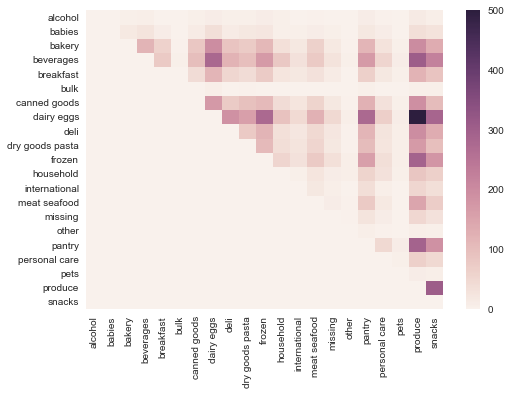

In [92]:
sns.heatmap(frequent_items_df)


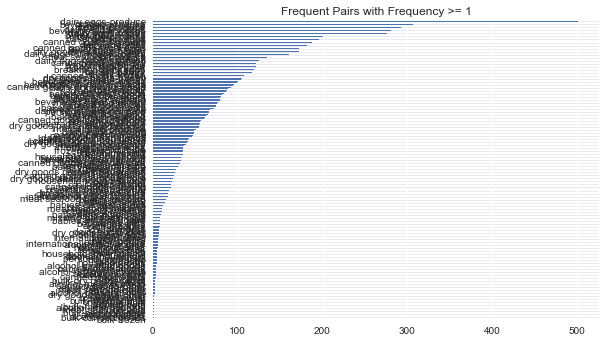

In [96]:
from collections import OrderedDict
from fractions import Fraction

department_names = odf.columns.values

def extract_pairs(threshold):
    output = {}
    # select indexes with larger or equal n
    matrix_coord_list = np.where(frequent_items_matrix >= threshold)
    # take values
    row_coords = matrix_coord_list[0]
    column_coords = matrix_coord_list[1]
    # generate pairs
    for index, value in enumerate(row_coords):
        #print index
        row = row_coords[index]
        column = column_coords[index]
        # get department names
        first_department = department_names[row]
        second_department = department_names[column]
        # number of basket matches
        matches = frequent_items_matrix[row,column]
        # put key values into dict
        output[first_department+"-"+second_department] = matches
    
    # return sorted dict
    sorted_output = OrderedDict(sorted(output.items(), key=lambda x: x[1]))
    return sorted_output
    
# plot pairs with minimum frequency of 2 basket matches
min_frequency = 1
ax = pd.Series(extract_pairs(min_frequency)).plot(kind="barh", title="Frequent Pairs with Frequency >= " + str(min_frequency))


### Will you purchase bananas?

In [100]:
new_products[new_products['product_name']=='Banana']

,product_id,product_name,aisle_id,department_id,aisle,department
24851,24852,Banana,24,4,fresh fruits,produce


In [101]:
new_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


https://pdfs.semanticscholar.org/a1c1/5f4594629d3a5a72e038084e6f6c370d5dd8.pdf

### Benchmark: Top N% of Products + Reordered

In [56]:
## datasets
# new_train.head()
# new_prior.head()
# new_products.head()
# print len(new_prior.groupby('order_id').count())
# print len(new_train.groupby('order_id').count())

def test_set_builder(order_frame = orders, prior_frame = new_prior):
    test_orders = orders[orders.eval_set=='test']
    test_priors = new_prior[new_prior.reordered==1][['order_id', 'user_id','product_id', 'add_to_cart_order']]
    new_test = pd.merge(test_orders, test_priors, on='user_id')
    return new_test

In [59]:
# test_orders.head()
# test_priors.head()
# new_test = pd.merge(test_orders, test_priors, on='user_id')
# test_comb.head()

(75000, 7)

In [43]:
test_priors.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
5,2,17794,6,1,202279,prior,3,5,9,8.0
6,2,40141,7,1,202279,prior,3,5,9,8.0


In [32]:
## mess with a smaller test dataframe
tdf = new_prior.copy(deep=True)

In [24]:
# tdf = tdf[0:30000]

In [69]:
ntdf = tdf[tdf.reordered==1]

In [74]:
pop_prods = ntdf.groupby(['product_id']).agg({'order_id': lambda x: x.count()}).sort_values(['order_id'], ascending=[False])
pop_prods['total'] = len(ntdf)
pop_prods['perc'] = 100*pop_prods['order_id'] / pop_prods['total']
pop_prods['cum_sum'] = pop_prods.perc.cumsum()

In [91]:
# pop_prods[pop_prods.cum_sum < 33].reset_index().product_id

In [4]:
# pickleup(pop_prods, 'pickled_data/pop_prods.p')
# pickleup(ntdf, 'pickled_data/ntdf.p')
# pickleup(tdf, 'pickled_data/tdf.p')

pop_prods = unpickle('pickled_data/pop_prods.p')
ntdf = unpickle('pickled_data/ntdf.p')
tdf = unpickle('pickled_data/tdf.p')

unpickling: pickled_data/pop_prods.p ...
unpickling: pickled_data/ntdf.p ...
unpickling: pickled_data/tdf.p ...


To Do List:
- create new columns in test dataframe: does reordered=1 AND product is in our top 30% list? 40%? 50%? 10%?
- group test dataframe by user to form predictions
- figure out how to submit
- see if I can adjust the process and make it better

Notes for blog post:
- rational approach to simple benchmarking a hard problem
- intro discuss what are the types of solutions the best solution COULD be
- then discuss how can we create a benchmark? - perhaps mention process at birchbox
- simple thought process, whats a reasonable answer
- can we optimize for the right top n perc of products to include?
- can this end up as a feature, or are there other features to transition this into a true classification problem?


In [5]:
tdf.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [6]:
def benchmark_model_builder(df = tdf, perc_of_prods = 20):
    
    reordered_df = df[df.reordered==1]

    pop_prods = reordered_df.groupby(['product_id']).agg({'order_id': lambda x: x.count()}).sort_values(['order_id'], ascending=[False])
    pop_prods['total'] = len(reordered_df)
    pop_prods['perc'] = 100*pop_prods['order_id'] / pop_prods['total']
    pop_prods['cum_sum'] = pop_prods.perc.cumsum()
    
    pop_prods = pop_prods[pop_prods.cum_sum < perc_of_prods]
    
    list_of_prods = pop_prods.index.tolist()
    
    print('There are {} products in the top {} percent of popular prods').format(len(list_of_prods), perc_of_prods)
    
#     new_df['predict_flag'] = new_df.apply(lambda x: 1 if x.isin(list_of_prods) else 0)

#     df['predict_flag'] = np.where((df['reordered']==1) & (df['product_id'].isin(list_of_prods)), 1, 0)
#     df['reordered'].apply(lambda x: 1 if x==1 else 0)
    
    return list_of_prods

In [7]:
new_df = basic_model_builder(tdf, 30)

There are 118 products in the top 30 percent of popular prods


In [8]:
def benchmark_model_compiler(df, list_of_prods):
    # getting an error, figure out a non-errored method?
    
    df['predict_flag'] = np.where((df['reordered']==1) & (df['product_id'].isin(list_of_prods)), 1, 0)
    
    df['product_id'] = df['product_id'].astype(str)
    
    product_df = df.groupby(['order_id','predict_flag'])['products'].apply(lambda x: ','.join(x)).reset_index()
    
    predicted_df = product_df[product_df.predict_flag==1][['order_id', 'products']]
    
    output_df = df.groupby(['order_id'])['user_id'].agg({'user_id': lambda x: max(x)}).reset_index()
    
    output_df = output_df.set_index('order_id')
    predicted_df = predicted_df.set_index('order_id')
    
    output_df = output_df.join(predicted_df, how='left', lsuffix='_tester')
    
    output_df = output_df.replace(to_replace=np.nan, value='None')
    
    return output_df

## NOTES ON THIS FUNCTION
## NEED TO MORE CLOSELY EXAMINE SUBMISSION FILE
## IS REORDERED INCLUDED? IS THE SUBMISSION FILE BY ORDER_ID OR BY USER_ID?
## VERY IMPORTANT
    
    

In [22]:
# tester = new_df.copy(deep=True)

# tester['products'] = tester['product_id'].astype(str)

# product_df = tester.groupby(['order_id','predict_flag'])['products'].apply(lambda x: ' '.join(x)).reset_index()

# predicted_df = product_df[product_df.predict_flag==1][['order_id', 'product_id']]

# output_df = tester.groupby(['order_id'])['user_id'].agg({'user_id': lambda x: max(x)}).reset_index()

# output_df = output_df.set_index('order_id')
# predicted_df = predicted_df.set_index('order_id')

output_df = output_df.join(predicted_df, how='left', lsuffix='_tester')

In [29]:
# output_df.replace(to_replace=np.nan, value='None')
output_df.head()
# predicted_df.head()

,user_id,product_id
order_id,,
2,202279,"28985,17794"
3,205970,"33754,24838,21903,46667"
4,178520,NaN
5,156122,"13176,27966,23909,6184"
6,22352,NaN


In [9]:
output = order_product_compiler(new_df)

KeyError: 'order_id'

In [32]:
new_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0
